# Lab 4.3: Central Limit Theorem

## Outline

- Central Limit Theorem Basics
- Central Limit Theorem Simulation
- Central Limit Theorem Application

### Central Limit Theorem Basics

**Question 1**  

1) What is the Central Limit Theorem? Explain it in your own words.
   

2) What are the assumptions for the Central Limit Theorem?

### Central Limit Theorem Simulation

**Question 2**

Here we will write a function to show that the Central Limit Theorem applies to different distributions. 

1) Write a function `make_draws` which will make a number of draws from one of the following distributions, Possion, Binomial and Uniform. The function will take 3 arguments:
   - The name of the distribution as a string, e.g. `poisson`, `binomial` and `uniform`
   - The parameters associated with the distribution as a dictionary, for example `{'n': 30, 'p': 0.02}` for the binomial distribution 
   - The number of observations to be drawn in a sample  
   
   The function should return an array of values drawn from the specified distribution with the correct sample size.
   
   Below is an example for the binomial distribution
   
   ```python
   # import the stats module from scipy
   from scipy import stats

   def make_draws(distribution, parameters, size):
       if distribution == 'binomial':
           n, p = parameters['n'], parameters['p']
           dist = stats.binom(n, p).rvs(size)

       # Rest of the code
    ```
   

In [6]:
from scipy import stats
import matplotlib.pyplot as plt

In [26]:
def make_draws(distribution, parameters, size):
    if distribution == 'binomial':
        n, p = parameters['n'], parameters['p']
        dist = stats.binom(n, p).rvs(size)
    
    elif distribution == 'poisson':
        mu = parameters['l']
        dist = stats.poisson(mu).rvs(size)
    
    elif distribution == 'uniform':
        a, b = parameters['a'], parameters['b']
        dist = stats.uniform(a,b).rvs(size)
    
    return dist

In [32]:
make_draws('poisson', {'l': 10}, 10)

array([ 7,  8,  5, 12, 11, 10, 17, 10,  9,  7])

In [27]:
#stats.uniform(0,1).rvs(10)
dist = stats.poisson(5).rvs(10)
dist

array([5, 6, 4, 4, 5, 3, 2, 6, 3, 3])

   
2) Write another function `plot_means` that would take the same arguments as `make_draws` plus an additional argument `repeats`
   - `plot_means` would repeatedly draw samples by calling `make_draws`, the number of times `make_draws` is called is speicified by `repeats`
   - The number of observations in each sample is specified by `size`
   - Then the mean of each sample is computed and plotted on a histogram
   
   Below is some starter code:
   
   ```python 
   def plot_means(distribution, parameters, size, repeats):
       # call make_draws for times specified by repeats
       # compute mean for each of the sample
       # plot histogram
   ```
   

In [33]:
def plot_means(distribution, paramters, size, repeats):
    mean_of_samples = [ make_draws(distribution, paramters, size).mean() for i in range(repeats)]
    plt.hist(mean_of_samples)

3) Call `plot_means` with each of the distribution (poisson, binomial, etc) with the following arguments:
   - `size`: 500 and `repeats`: 500
   - `size`: 10 and `repeats`: 500 
   
   For example, the histogram should look like the following if you call
   ```python
   plot_means('uniform', {'a': 1, 'b': 200}, 500, 500)
   plot_means('uniform', {'a': 1, 'b': 200}, 10, 500)
   ```
   
   ![image](images/unif_histogram.png)
   
   What do you observe? Under what condition does the Central Limit Theorem hold?

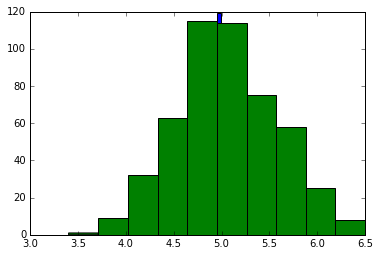

In [46]:
plot_means('binomial', {'n': 10, 'p': 0.5}, 500, 500)
plot_means('binomial', {'n': 10, 'p': 0.5}, 10, 500)

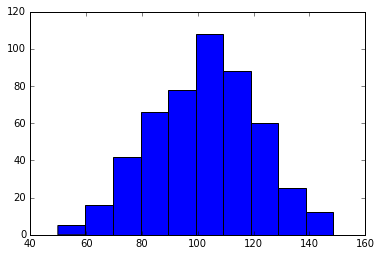

In [35]:
plot_means('uniform', {'a': 1, 'b': 200}, 10, 500)

### Central Limit Theorem Application

**Question 3**

1) It is known that the amount that a person spends on a single trip to a grocery store follows a distribution with mean of \$3.70 and standard deviation of \$1.52.

   A random sample of 50 people's spendings is collected. 
   
   What is the probability that the mean spending of the 50 people exceeds $4?


In [36]:
import math

In [41]:
n = 50
mu = 3.70
sd = 1.52

1 - stats.norm(mu, sd/math.sqrt(n)).cdf(4)

0.081416664277620843

2) From past experience, it is known that, at the ticket counter for the football match of Stanford against Berkeley,  the number of tickets purchased by each student follows a distribution that has mean $\mu$ = 2.4 and standard deviation $\sigma$ = 2.0.

   Suppose that a few hours before the start of one of these matches, there are 100 eager students standing in line to purchase tickets. If only 250 tickets remain, what is the probability that all 100 students will be able to purchase the tickets they desire?

In [44]:
n = 100
mu = 2.4
sd = 2.0

stats.norm(mu,sd/ math.sqrt(n)).cdf(250/n)

0.69146246127401323

### Extra Practice  
(Optional)

1) Create your own distribution. It can be any distribution as long as it is a valid probability distribution. Refer to the `custom` distribution we created in the lecture.

2) Draw 10000 samples from the distribution above with the following sample sizes. Calculate and plot the sample means for each sample size. What do you notice from the 3 plots?

    * n = 10
    * n = 100
    * n = 1000

3) Fit a Normal distribution to the 3 sets of samples means from part 2). Then plot the Normal distribution on top of the histogram of the means.  

4) Estimate the Standard Error of the Mean (SEM calculation in the lecture) for each of the 3 sample means. What do you notice? How does the SEM change as the sample size changes?